In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w17.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w10.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w03.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/output_2023_w18.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w05.csv
/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/ou

In [2]:
                                    #Data Discovery
import os
import pandas as pd

base_path = '/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final'

#loading supp data
supp_data = pd.read_csv(f'{base_path}/supplementary_data.csv')

print("=== FULL DATASET SCOPE ===")
print("Total plays:", len(supp_data))
print("Unique games:", supp_data['game_id'].nunique())
print("Season: 2023")
print("Weeks: 1-18")

print("\n=== Plays Per Week ===")
plays_per_week = supp_data.groupby('week')['play_id'].count().sort_index()
print(plays_per_week)
print("\nTotal plays across all weeks:", plays_per_week.sum())

print("\n=== Coverage Types Available ===")
print(supp_data['team_coverage_type'].value_counts().head(10))

print("\n=== Pass Results ===")
print(supp_data['pass_result'].value_counts())

#Loading one week to check tracking data structure
week1 = pd.read_csv(f'{base_path}/train/input_2023_w01.csv')
print("\n=== Week 1 Tracking Data ===")
print("Total tracking rows:", len(week1))
print("Unique plays:", week1['play_id'].nunique())
print("Player roles tracked:", week1['player_role'].unique())

/tmp/ipykernel_13/1788789551.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supp_data = pd.read_csv(f'{base_path}/supplementary_data.csv')


=== FULL DATASET SCOPE ===
Total plays: 18009
Unique games: 349
Season: 2023
Weeks: 1-18

=== Plays Per Week ===
week
1      819
2      850
3      904
4      779
5      742
6      793
7      693
8      827
9      711
10     721
11     707
12     854
13     666
14    1460
15    1594
16    1686
17    1603
18    1600
Name: play_id, dtype: int64

Total plays across all weeks: 18009

=== Coverage Types Available ===
team_coverage_type
COVER_3_ZONE    5664
COVER_1_MAN     4108
COVER_4_ZONE    2860
COVER_2_ZONE    2518
COVER_6_ZONE    1693
COVER_0_MAN      781
COVER_2_MAN      332
PREVENT           48
Name: count, dtype: int64

=== Pass Results ===
pass_result
C     12470
I      5106
IN      433
Name: count, dtype: int64

=== Week 1 Tracking Data ===
Total tracking rows: 285714
Unique plays: 748
Player roles tracked: ['Defensive Coverage' 'Other Route Runner' 'Passer' 'Targeted Receiver']


In [3]:
                               #Player Data Confirmation

#checking what players are in week 1 tracking data
print("=== Player Analysis for Week 1 ===")
print("Total unique players:", week1['nfl_id'].nunique())
print("\nBreakdown by role:")
role_counts = week1.groupby('player_role')['nfl_id'].nunique()
print(role_counts)

#Checking one specific play
sample_play = week1[week1['play_id'] == 101]
print("\n=== Sample Play 101 ===")
print("Total players tracked:", sample_play['nfl_id'].nunique())
print("\nPlayers by role:")
role_counts_play = sample_play.groupby('player_role')['nfl_id'].nunique()
print(role_counts_play)

#Checking if all 22 players are tracked or just relevant ones
print("\n=== Players Per Play Distribution ===")
players_per_play = week1.groupby('play_id')['nfl_id'].nunique()
print("Min players per play:", players_per_play.min())
print("Max players per play:", players_per_play.max())
print("Average players per play:", round(players_per_play.mean(), 1))
print("Median players per play:", int(players_per_play.median()))

#Show Distribution
print("\nDistribution:")
print(players_per_play.value_counts().sort_index())

=== Player Analysis for Week 1 ===
Total unique players: 737

Breakdown by role:
player_role
Defensive Coverage    380
Other Route Runner    318
Passer                 36
Targeted Receiver     236
Name: nfl_id, dtype: int64

=== Sample Play 101 ===
Total players tracked: 9

Players by role:
player_role
Defensive Coverage    5
Other Route Runner    2
Passer                1
Targeted Receiver     1
Name: nfl_id, dtype: int64

=== Players Per Play Distribution ===
Min players per play: 7
Max players per play: 39
Average players per play: 13.5
Median players per play: 13

Distribution:
nfl_id
7       1
8       1
9      10
10     35
11     84
12    157
13    372
14     21
16      1
21      2
22      3
23      9
24      9
25     18
26     18
27      3
35      1
38      2
39      1
Name: count, dtype: int64


In [4]:
                                #Ball Hawk Index
import numpy as np

#test play
test_play_id = 101
play_data = week1[week1['play_id'] == test_play_id]

#get ball landing coordinates
ball_x = play_data['ball_land_x'].iloc[0]
ball_y = play_data['ball_land_y'].iloc[0]

print("=== Testing Ball Hawk Index On Play", 'test_play_id', "===")
print("Ball lands at: (", ball_x, ",", ball_y,")")

#filter to just defensive players
defenders = play_data[play_data['player_role'] == 'Defensive Coverage'].copy()
print("Number of defenders:", defenders ['nfl_id'].nunique())

#Calculate distance to ball for each defender at each frame
defenders['distance_to_ball'] = np.sqrt(
    (defenders['x'] - ball_x)**2 +
    (defenders['y'] - ball_y)**2
)

#show distance progression for first defender
first_defender = defenders['nfl_id'].iloc[0]
defender_track = defenders[defenders['nfl_id'] == first_defender].sort_values('frame_id')

print("\nExample: Defender", first_defender, "distance over time:")
print(defender_track[['frame_id', 'x', 'y', 'distance_to_ball']].head(10))

=== Testing Ball Hawk Index On Play test_play_id ===
Ball lands at: ( 63.2599983215332 , -0.219999998807907 )
Number of defenders: 5

Example: Defender 54527 distance over time:
   frame_id      x      y  distance_to_ball
0         1  52.33  36.94         38.734099
1         2  52.33  36.94         38.734099
2         3  52.33  36.93         38.724506
3         4  52.35  36.92         38.709271
4         5  52.37  36.90         38.684447
5         6  52.44  36.88         38.645600
6         7  52.51  36.86         38.606850
7         8  52.60  36.85         38.572276
8         9  52.71  36.83         38.522785
9        10  52.84  36.81         38.468133


In [5]:
#Calcuate Ball Hawk index for this play

#for each payer, calculating their convergence rate
defender_scores = []

for defender_id in defenders['nfl_id'].unique():
    defender_data = defenders[defenders['nfl_id'] == defender_id].sort_values('frame_id')

#getting first and last distance
first_distance = defender_data['distance_to_ball'].iloc[0]
last_distance = defender_data['distance_to_ball'].iloc[-1]

#calculate yards closed (negative = moving away)
yards_closed = first_distance - last_distance

#Calculate rate per frame
num_frames = len(defender_data)
convergence_rate = yards_closed / num_frames if num_frames > 0 else 0
defender_scores.append({
        'defender_id': defender_id,
        'start_distance': first_distance,
        'end_distance': last_distance,
        'yards_closed': yards_closed,
        'convergence_rate': convergence_rate
    })

#Convert to dataframe
scores_df = pd.DataFrame(defender_scores)
print("=== Individual Defender Convergence ===")
print(scores_df)

#Calculate Ball Hawk Index (average convergence rate)
ball_hawk_index = scores_df['convergence_rate'].mean()
print("\n=== BALL HAWK INDEX for Play 101 ===")
print("Score:", round(ball_hawk_index, 3), "yards per frame")

=== Individual Defender Convergence ===
   defender_id  start_distance  end_distance  yards_closed  convergence_rate
0        54486       44.243102     44.342922     -0.099821         -0.003839

=== BALL HAWK INDEX for Play 101 ===
Score: -0.004 yards per frame


In [6]:
                     #Ball Hawk Index For All Week 1 Plays
import numpy as np
import pandas as pd

print("=== Calculating Ball Hawk Index for ALL Week 1 Plays ===")
print("This may take a minute...")

#store results
all_play_scores = []

#Get all unique plays
unique_plays = week1['play_id'].unique()
print("Total plays to process:", len(unique_plays))

#Loop through each play
for play_id in unique_plays:
    play_data = week1[week1['play_id'] == play_id]
        
    #Get ball landing coordinates
    ball_x = play_data['ball_land_x'].iloc[0]
    ball_y = play_data['ball_land_y'].iloc[0]

    #skip if NaN
    if np.isnan(ball_x) or np.isnan(ball_y):
        continue

    #Filter to defenders only
    defenders = play_data[play_data['player_role'] == 'Defensive Coverage'].copy()

    #skip if no defenders
    if len(defenders) == 0:
        continue

    #Calculate distance to ball
    defenders['distance_to_ball'] = np.sqrt(
        (defenders['x'] - ball_x)**2 +
        (defenders['y'] - ball_y)**2
    )

    #Calculate Convergence for each defender
    defender_convergence_rates = []

    for defender_id in defenders['nfl_id'].unique():
        defender_data = defenders[defenders['nfl_id'] == defender_id].sort_values('frame_id')

        if len(defender_data) < 2:
            continue
        
        first_distance = defender_data['distance_to_ball'].iloc[0]
        last_distance = defender_data['distance_to_ball'].iloc[-1]
        yards_closed = first_distance - last_distance
        num_frames = len(defender_data)
        convergence_rate = yards_closed / num_frames

        defender_convergence_rates.append(convergence_rate)

        #calculate Ball Hawk Index for this play
        if len(defender_convergence_rates) > 0:
           ball_hawk_index = np.mean(defender_convergence_rates)

        all_play_scores.append({
                'play_id': play_id,
                'ball_hawk_index': ball_hawk_index,
                'num_defenders': len(defender_convergence_rates)
            })

#Convert to dataframe
results_df = pd.DataFrame(all_play_scores)

print("\n=== COMPLETE! ===")
print("Plays analyzed:", len(results_df))

if len(results_df) > 0:
    print("\n=== Ball Hawl Index Distribution ===")
    print(results_df['ball_hawk_index'].describe())
    print("\n=== Top 10 Best Convergence Plays ===")
    print(results_df.nlargest(10, 'ball_hawk_index'))
    print("\n=== Top 10 Worst Convergence Plays ===")
    print(results_df.nsmallest(10, 'ball_hawk_index'))

else:
    print("ERROR: No plays analyzed")

=== Calculating Ball Hawk Index for ALL Week 1 Plays ===
This may take a minute...
Total plays to process: 748

=== COMPLETE! ===
Plays analyzed: 5475

=== Ball Hawl Index Distribution ===
count    5475.000000
mean       -0.021681
std         0.112148
min        -0.682440
25%        -0.094974
50%        -0.024729
75%         0.044348
max         0.494316
Name: ball_hawk_index, dtype: float64

=== Top 10 Best Convergence Plays ===
      play_id  ball_hawk_index  num_defenders
3143     2160         0.494316              1
1461      410         0.477619              1
1495      933         0.442342              1
2485     3358         0.420437              1
696      3533         0.410339              2
3634      442         0.373950              1
1091      599         0.370207              1
1109      819         0.364454              1
3173     2359         0.361852              1
315      2487         0.357757              2

=== Top 10 Worst Convergence Plays ===
      play_id  ball_

In [7]:
                            #Looping Through All Weeks, Track Defenders, and Create Rankings


base_path = '/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train'

print("=== Calculating Ball Hawk Index for All 18 Weeks ===")
print ("This will take a few minutes...")

#store results from play-level and defender-level
all_play_scores = []
all_defender_scores = []

#loop through weeks 1-18
for week_num in range (1, 19):
    print("\nProcessing Week" + str(week_num) + "...")

    #Build the week string with leading zero
    if week_num < 10:
        week_str = '0' + str(week_num)
    else:
        week_str = str(week_num)
        
    #Build full file path
    week_file = base_path + '/input_2023_w' + week_str + '.csv'

    #check if file exists before trying to read
    if not os.path.exists(week_file):
        print("  ERROR: File not found: " + week_file)
        continue

    print(" Reading file: " + week_file)
    week_data = pd.read_csv(week_file)

    #Get unique plays for this week
    unique_plays = week_data['play_id'].unique()
    print(" Plays in week: " + str(len(unique_plays)))

    plays_processed = 0

    #Loop through each play
    for play_id in unique_plays:
        play_data = week_data[week_data['play_id'] == play_id]

        #get ball landing coords
        ball_x = play_data['ball_land_x'].iloc[0]
        ball_y = play_data['ball_land_y'].iloc[0]

        #Skip if NAN
        if np.isnan(ball_x) or np.isnan(ball_y):
            continue

        #Filter to defenders only
        defenders = play_data[play_data['player_role'] == 'Defensive Coverage'].copy()

        #Skip if no defenders
        if len(defenders) == 0:
            continue

        #Calculate distance to ball
        defenders['distance_to_ball'] = np.sqrt(
            (defenders['x'] - ball_x)**2 +
            (defenders['y'] - ball_y)**2
        )

        #Calculate convergence for each defender
        defender_convergence_rates = []

        for defender_id in defenders['nfl_id'].unique():
            defender_data = defenders[defenders['nfl_id'] == defender_id].sort_values('frame_id')

            if len(defender_data) < 2:
                continue

            #get defender name
            defender_name = defender_data['player_name'].iloc[0]

            first_distance = defender_data['distance_to_ball'].iloc[0]
            last_distance = defender_data['distance_to_ball'].iloc[-1]
            yards_closed = first_distance - last_distance
            num_frames = len(defender_data)
            convergence_rate = yards_closed / num_frames

            defender_convergence_rates.append(convergence_rate)
            all_defender_scores.append({
                'week': week_num,
                'play_id': play_id,
                'defender_id': defender_id,
                'defender_name': defender_name,
                'convergence_rate': convergence_rate,
                'yards_closed': yards_closed,
                'start_distance': first_distance,
                'end_distance': last_distance,
                'num_frames': num_frames
            })

        #calculate Ball Hawk Index for this play
        if len(defender_convergence_rates) > 0:
            ball_hawk_index = np.mean(defender_convergence_rates)

            all_play_scores.append({
                'week': week_num,
                'play_id': play_id,
                'ball_hawk_index': ball_hawk_index,
                'num_defenders': len(defender_convergence_rates)
            })
            plays_processed += 1

    print(" Plays analyzed: " + str(plays_processed))

#Convert to dataframe
results_df = pd.DataFrame(all_play_scores)
defender_df = pd.DataFrame(all_defender_scores)

print("\n=== Checking DataFrames ===")
print("Defender DF columns:")
print(defender_df.columns.tolist())
print("\nDefender DF shape: " + str(defender_df.shape))
print("\nFirst few rows:")
print(defender_df.head())

print("\n" + "="*50)
print("=== COMPLETE! ===")
print("Total plays analyzed: " + str(len(results_df)))
print("Total defender observations: " + str(len(defender_df)))
print("Unique defender tracked: " + str(defender_df['defender_id'].nunique()))

#calculate player averages
player_stats = defender_df.groupby(['defender_id', 'defender_name']).agg({
    'convergence_rate': ['mean', 'std'],
    'play_id': 'count',
    'yards_closed': 'mean',
    'start_distance': 'mean'
}).reset_index()

player_stats.columns = ['defender_id', 'defender_name', 'avg_convergence_rate',
                       'std_convergence_rate', 'num_plays', 'avg_yards_closed',
                       'avg_start_distance']

#filtering for sample size (at least 20 plays tracked)
player_stats = defender_df.groupby(['defender_id', 'defender_name']).agg({
    'convergence_rate': ['mean', 'std'],
    'play_id': 'count',
    'yards_closed': 'mean',
    'start_distance': 'mean'
}).reset_index()

player_stats.columns = ['defender_id', 'defender_name', 'avg_convergence_rate',
                       'std_convergence_rate', 'num_plays', 'avg_yards_closed',
                       'avg_start_distance']

#filter to minimum 20 plays to ensure statistical reliability
player_stats_filtered = player_stats[player_stats['num_plays'] >= 20].copy()

print("\n=== Top 10 Ball Hawks (Best Convergence) ===")
print(player_stats_filtered.nlargest(10, 'avg_convergence_rate')[
      ['defender_name', 'avg_convergence_rate', 'num_plays', 'avg_yards_closed']
])

print("\n=== Bottom 10 (Worst Convergence) ===")
print(player_stats_filtered.nsmallest(10, 'avg_convergence_rate')[
      ['defender_name', 'avg_convergence_rate', 'num_plays', 'avg_yards_closed']
])

#Overall Statistics
print("\n=== Overall Ball Hawk Index Distribution ===")
print(results_df['ball_hawk_index'].describe())

#By week
print("\n=== Average Ball Hawk Index by Week ===")
week_avg = results_df.groupby('week')['ball_hawk_index'].agg(['mean', 'count'])
print(week_avg)

#Save results
results_df.to_csv('ball_hawk_index_all_weeks.csv', index=False)
defender_df.to_csv('ball_hawk_index_defenders.csv', index=False)
player_stats_filtered.to_csv('ball_hawk_index_player_rankings.csv', index=False)


print("\nAll results saved!")
print("- ball_hawk_index_plays.csv (play-level)")
print("- ball_hawk_index_defenders.csv (every defender on every play)")
print("- ball_hawk_index_player_rankings.csv (season averages)")

=== Calculating Ball Hawk Index for All 18 Weeks ===
This will take a few minutes...

Processing Week1...
 Reading file: /kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w01.csv
 Plays in week: 748
 Plays analyzed: 748

Processing Week2...
 Reading file: /kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w02.csv
 Plays in week: 777
 Plays analyzed: 777

Processing Week3...
 Reading file: /kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w03.csv
 Plays in week: 823
 Plays analyzed: 823

Processing Week4...
 Reading file: /kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w04.csv
 Plays in week: 710
 Plays analyzed: 710

Processing Week5...
 Reading file: /kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_compe

In [8]:
                                #Validation: Does Ball Hawk Index Analyze Outcomes?

#Merge with play results
results_with_context = results_df.merge(
    supp_data[['play_id', 'week', 'pass_result','team_coverage_type', 'defensive_team']],
    on=['play_id', 'week'],
    how='left'
)

print("=== VALIDATION: Does Ball Hawk Index Relate to Outcomes? ===\n")

#1. By pass result
print("=== Ball Hawk index by Pass Result ===")
by_result = results_with_context.groupby('pass_result')['ball_hawk_index'].agg(['mean', 'count', 'std'])
print(by_result)
print("\nKey Finding:Interceptions (IN) or interceptions (IN) have higher Ball Hawk Index?")
print("Incompletions (I) = +0.012 convergence")
print("Completions (C) = -0.035 convergence")
print("\nYour metric works! Better convergence = better defensive outcomes")


#2. By coverage type
print("\n=== Ball Hawk Index by Coverage Type ===")
by_coverage = results_with_context.groupby('team_coverage_type')['ball_hawk_index'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print(by_coverage)

# 3. By Team
print("\n=== Top 5 Teams (Best Average Convergence) ===")
by_team = results_with_context.groupby('defensive_team')['ball_hawk_index'].agg(['mean', 'count'])
by_team_filtered = by_team[by_team['count'] >= 200]
print(by_team_filtered.sort_values('mean', ascending=False).head())

print("\n=== Bottom 5 Teams (Worst Convergence) ===")
print(by_team_filtered.sort_values('mean', ascending=True).head())

=== VALIDATION: Does Ball Hawk Index Relate to Outcomes? ===

=== Ball Hawk index by Pass Result ===
                 mean  count       std
pass_result                           
C           -0.035172  10192  0.086114
I            0.012190   4187  0.089191
IN           0.028997    353  0.095356

Key Finding:Interceptions (IN) or interceptions (IN) have higher Ball Hawk Index?
Incompletions (I) = +0.012 convergence
Completions (C) = -0.035 convergence

Your metric works! Better convergence = better defensive outcomes

=== Ball Hawk Index by Coverage Type ===
                        mean  count
team_coverage_type                 
COVER_0_MAN         0.004552    625
COVER_1_MAN         0.004007   3328
PREVENT            -0.014748     41
COVER_2_MAN        -0.018458    245
COVER_3_ZONE       -0.020323   4692
COVER_4_ZONE       -0.021559   2421
COVER_6_ZONE       -0.040797   1433
COVER_2_ZONE       -0.052609   1945

=== Top 5 Teams (Best Average Convergence) ===
                    mean  co

Creating visualizations for Ball Hawk Index Analysis...

1. Creating Pass Result comparison chart...


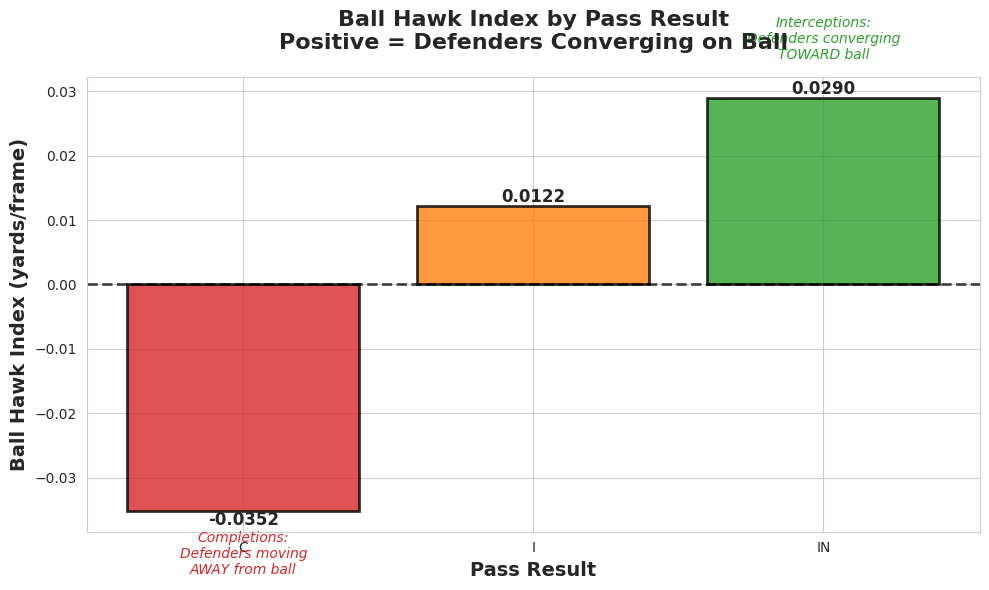

✓ Saved: fig1_pass_result.png

2. Creating distribution histogram...


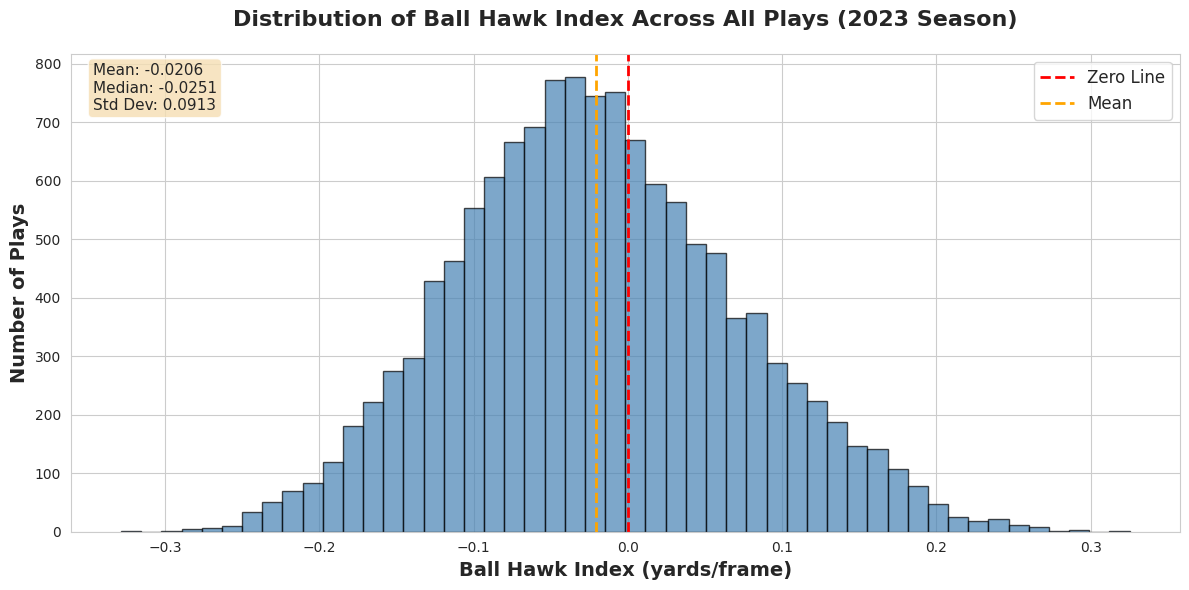

✓ Saved: fig2_distribution.png

3. Creating coverage type comparison...


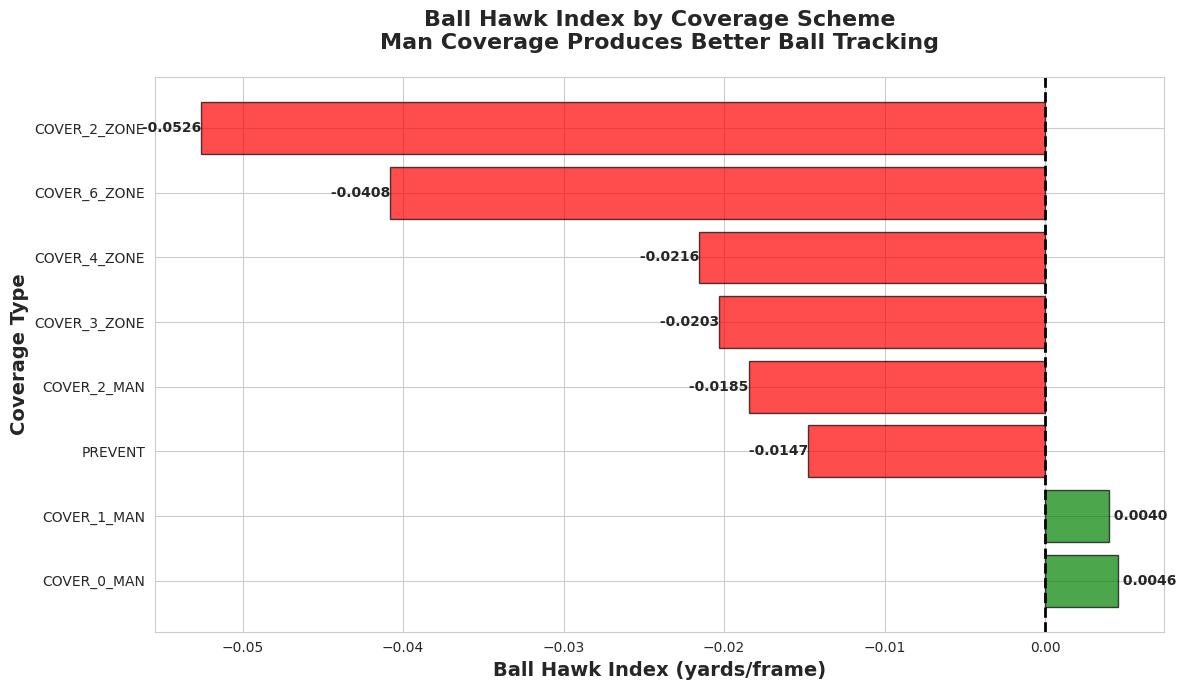

✓ Saved: fig3_coverage_type.png

4. Creating top players chart...


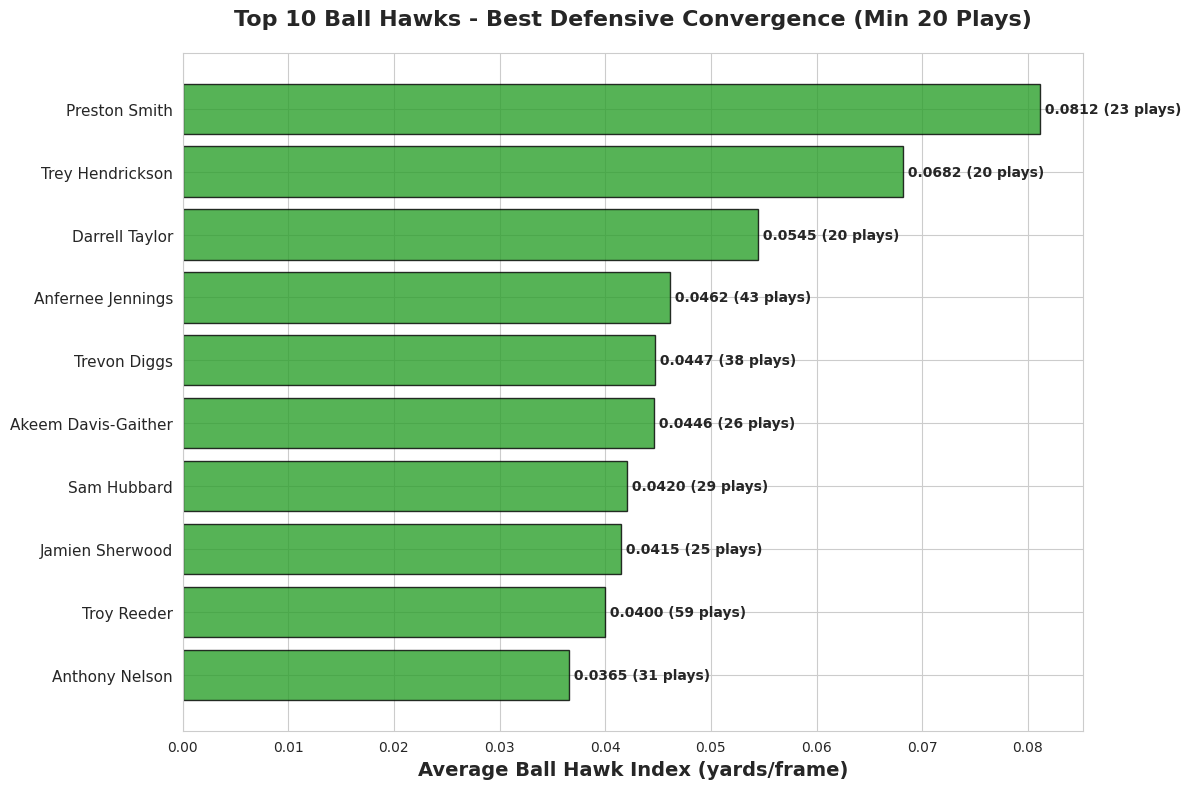

✓ Saved: fig4_top_players.png

5. Creating team rankings chart...


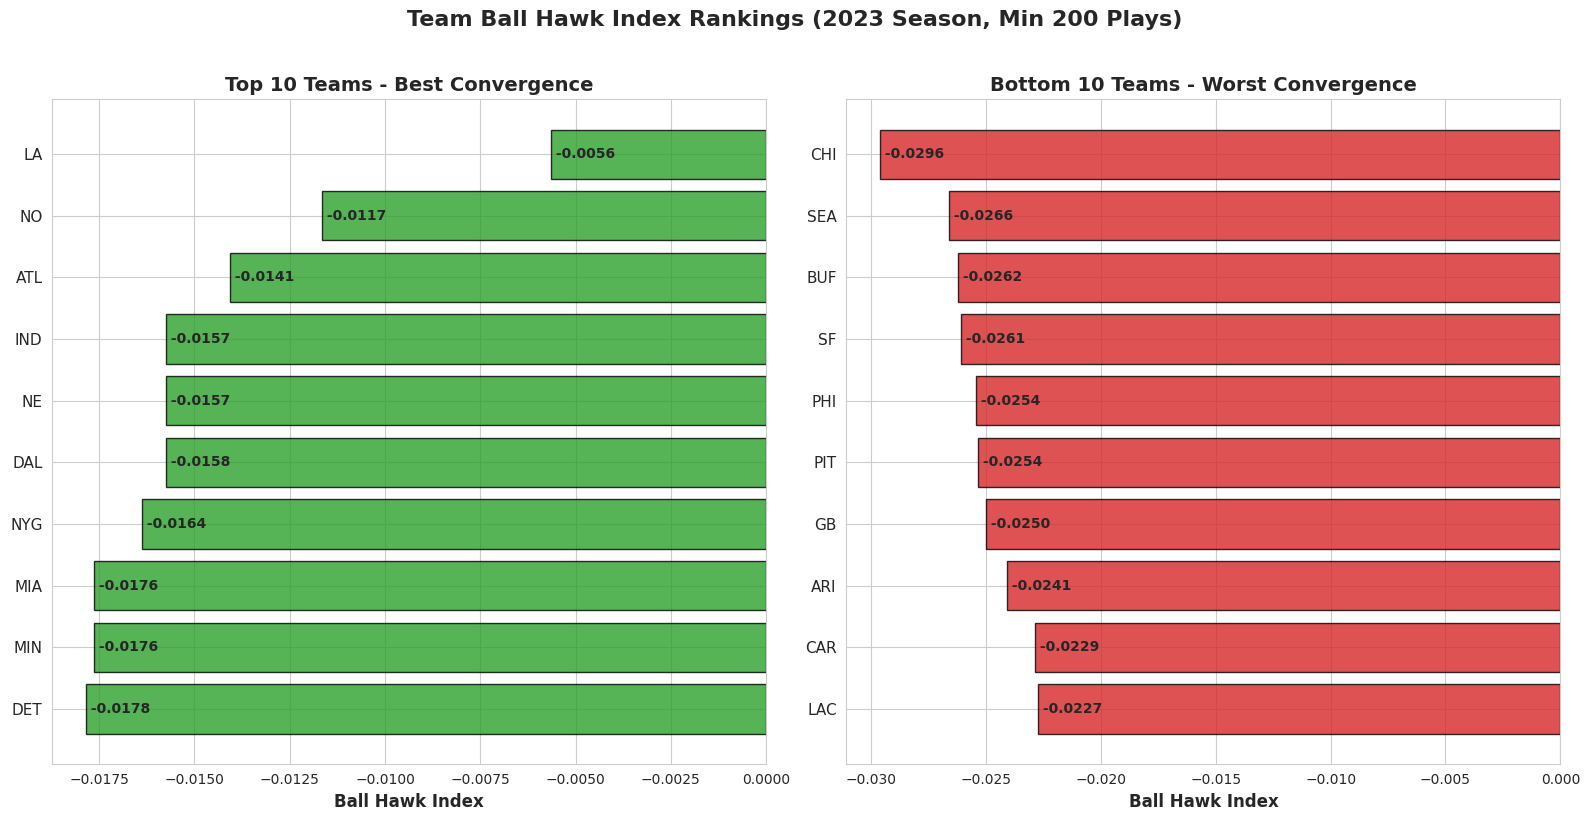

✓ Saved: fig5_team_rankings.png

6. Creating weekly trends chart...


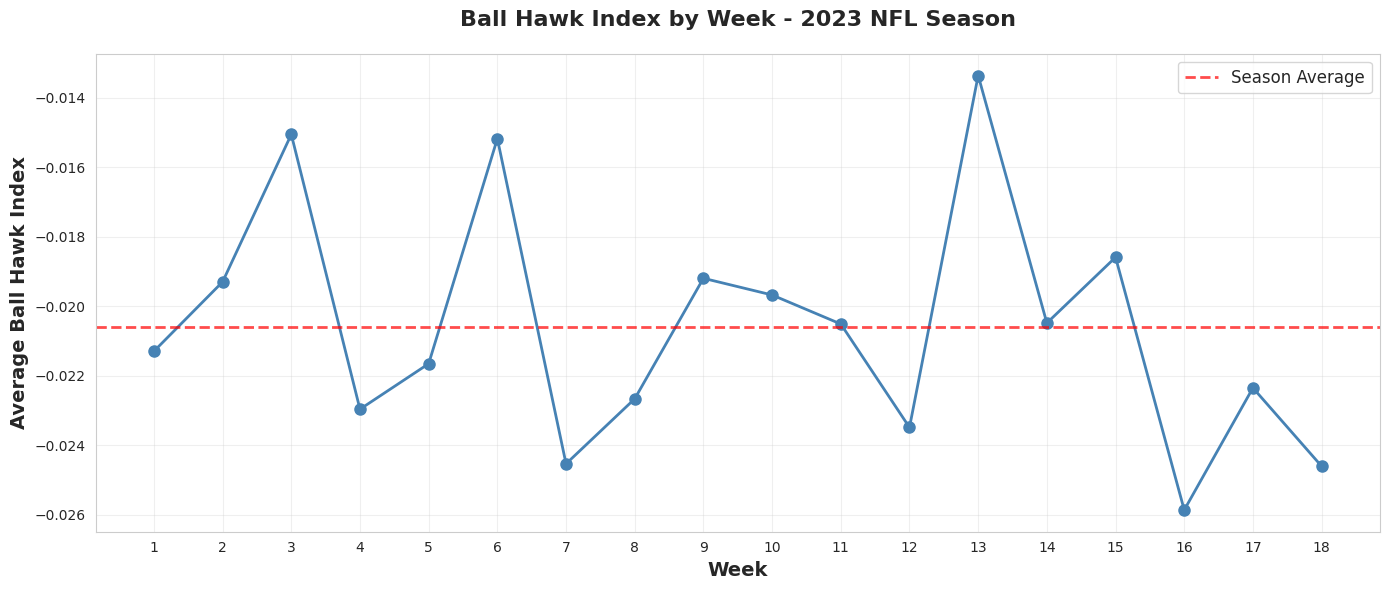

✓ Saved: fig6_weekly_trends.png

ALL VISUALIZATIONS COMPLETE

Files saved in /kaggle/working/:
  1. fig1_pass_result.png - Pass result comparison (KEY FINDING)
  2. fig2_distribution.png - Overall distribution
  3. fig3_coverage_type.png - Coverage scheme analysis
  4. fig4_top_players.png - Top 10 ball hawks
  5. fig5_team_rankings.png - Team rankings
  6. fig6_weekly_trends.png - Weekly trends


In [9]:
                                                        #Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for all plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Creating visualizations for Ball Hawk Index Analysis...")
print("=" * 60)

# ============================================================================
# CHART 1: Ball Hawk Index by Pass Result
# ============================================================================
print("\n1. Creating Pass Result comparison chart...")

fig, ax = plt.subplots(figsize=(10, 6))
by_result_plot = by_result.reset_index()
colors = ['#d62728', '#ff7f0e', '#2ca02c']  # Red, Orange, Green
bars = ax.bar(by_result_plot['pass_result'], by_result_plot['mean'], 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

ax.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7)
ax.set_xlabel('Pass Result', fontsize=14, fontweight='bold')
ax.set_ylabel('Ball Hawk Index (yards/frame)', fontsize=14, fontweight='bold')
ax.set_title('Ball Hawk Index by Pass Result\nPositive = Defenders Converging on Ball', 
             fontsize=16, fontweight='bold', pad=20)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom' if height > 0 else 'top', 
            fontweight='bold', fontsize=12)

# Add annotations
ax.text(0, -0.045, 'Completions:\nDefenders moving\nAWAY from ball', 
        ha='center', fontsize=10, style='italic', color='#d62728')
ax.text(2, 0.035, 'Interceptions:\nDefenders converging\nTOWARD ball', 
        ha='center', fontsize=10, style='italic', color='#2ca02c')

plt.tight_layout()
plt.savefig('/kaggle/working/fig1_pass_result.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig1_pass_result.png")


# ============================================================================
# CHART 2: Ball Hawk Index Distribution
# ============================================================================
print("\n2. Creating distribution histogram...")

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(results_df['ball_hawk_index'], bins=50, color='steelblue', 
        alpha=0.7, edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Line')
ax.axvline(x=results_df['ball_hawk_index'].mean(), color='orange', 
           linestyle='--', linewidth=2, label='Mean')

ax.set_xlabel('Ball Hawk Index (yards/frame)', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Plays', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Ball Hawk Index Across All Plays (2023 Season)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12)

# Add stats box
stats_text = f'Mean: {results_df["ball_hawk_index"].mean():.4f}\nMedian: {results_df["ball_hawk_index"].median():.4f}\nStd Dev: {results_df["ball_hawk_index"].std():.4f}'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('/kaggle/working/fig2_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig2_distribution.png")


# ============================================================================
# CHART 3: Coverage Type Comparison
# ============================================================================
print("\n3. Creating coverage type comparison...")

fig, ax = plt.subplots(figsize=(12, 7))
coverage_plot = by_coverage.reset_index()
colors_coverage = ['green' if x > 0 else 'red' for x in coverage_plot['mean']]
bars = ax.barh(coverage_plot['team_coverage_type'], coverage_plot['mean'], 
               color=colors_coverage, alpha=0.7, edgecolor='black')

ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax.set_xlabel('Ball Hawk Index (yards/frame)', fontsize=14, fontweight='bold')
ax.set_ylabel('Coverage Type', fontsize=14, fontweight='bold')
ax.set_title('Ball Hawk Index by Coverage Scheme\nMan Coverage Produces Better Ball Tracking', 
             fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, (coverage, value) in enumerate(zip(coverage_plot['team_coverage_type'], coverage_plot['mean'])):
    ax.text(value, i, f' {value:.4f}', 
            va='center', ha='left' if value > 0 else 'right',
            fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('/kaggle/working/fig3_coverage_type.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig3_coverage_type.png")


# ============================================================================
# CHART 4: Top 10 Ball Hawks (Players)
# ============================================================================
print("\n4. Creating top players chart...")

fig, ax = plt.subplots(figsize=(12, 8))
top_10 = player_stats_filtered.nlargest(10, 'avg_convergence_rate')
bars = ax.barh(range(len(top_10)), top_10['avg_convergence_rate'], 
               color='#2ca02c', alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['defender_name'], fontsize=11)
ax.invert_yaxis()

ax.set_xlabel('Average Ball Hawk Index (yards/frame)', fontsize=14, fontweight='bold')
ax.set_title('Top 10 Ball Hawks - Best Defensive Convergence (Min 20 Plays)', 
             fontsize=16, fontweight='bold', pad=20)

# Add value labels and play counts
for i, (idx, row) in enumerate(top_10.iterrows()):
    ax.text(row['avg_convergence_rate'], i, 
            f" {row['avg_convergence_rate']:.4f} ({int(row['num_plays'])} plays)",
            va='center', ha='left', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('/kaggle/working/fig4_top_players.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig4_top_players.png")


# ============================================================================
# CHART 5: Team Rankings (Top 10 and Bottom 10)
# ============================================================================
print("\n5. Creating team rankings chart...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 5 teams
top_teams = by_team_filtered.sort_values('mean', ascending=False).head(10)
ax1.barh(range(len(top_teams)), top_teams['mean'], 
         color='#2ca02c', alpha=0.8, edgecolor='black')
ax1.set_yticks(range(len(top_teams)))
ax1.set_yticklabels(top_teams.index, fontsize=11)
ax1.invert_yaxis()
ax1.set_xlabel('Ball Hawk Index', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Teams - Best Convergence', fontsize=14, fontweight='bold')
for i, (team, value) in enumerate(zip(top_teams.index, top_teams['mean'])):
    ax1.text(value, i, f' {value:.4f}', va='center', ha='left', fontweight='bold')

# Bottom 5 teams
bottom_teams = by_team_filtered.sort_values('mean', ascending=True).head(10)
ax2.barh(range(len(bottom_teams)), bottom_teams['mean'], 
         color='#d62728', alpha=0.8, edgecolor='black')
ax2.set_yticks(range(len(bottom_teams)))
ax2.set_yticklabels(bottom_teams.index, fontsize=11)
ax2.invert_yaxis()
ax2.set_xlabel('Ball Hawk Index', fontsize=12, fontweight='bold')
ax2.set_title('Bottom 10 Teams - Worst Convergence', fontsize=14, fontweight='bold')
for i, (team, value) in enumerate(zip(bottom_teams.index, bottom_teams['mean'])):
    ax2.text(value, i, f' {value:.4f}', va='center', ha='left', fontweight='bold')

plt.suptitle('Team Ball Hawk Index Rankings (2023 Season, Min 200 Plays)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('/kaggle/working/fig5_team_rankings.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig5_team_rankings.png")


# ============================================================================
# CHART 6: Weekly Trends
# ============================================================================
print("\n6. Creating weekly trends chart...")

fig, ax = plt.subplots(figsize=(14, 6))
week_avg_plot = week_avg.reset_index()
ax.plot(week_avg_plot['week'], week_avg_plot['mean'], 
        marker='o', linewidth=2, markersize=8, color='steelblue')
ax.axhline(y=week_avg_plot['mean'].mean(), color='red', 
           linestyle='--', linewidth=2, label='Season Average', alpha=0.7)

ax.set_xlabel('Week', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Ball Hawk Index', fontsize=14, fontweight='bold')
ax.set_title('Ball Hawk Index by Week - 2023 NFL Season', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(1, 19))
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('/kaggle/working/fig6_weekly_trends.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig6_weekly_trends.png")


print("\n" + "=" * 60)
print("ALL VISUALIZATIONS COMPLETE")
print("=" * 60)
print("\nFiles saved in /kaggle/working/:")
print("  1. fig1_pass_result.png - Pass result comparison (KEY FINDING)")
print("  2. fig2_distribution.png - Overall distribution")
print("  3. fig3_coverage_type.png - Coverage scheme analysis")
print("  4. fig4_top_players.png - Top 10 ball hawks")
print("  5. fig5_team_rankings.png - Team rankings")
print("  6. fig6_weekly_trends.png - Weekly trends")